In [1]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos'


d:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\duckduckgo_search\compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
d:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\duckduckgo_search\compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
d:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\duckduckgo_search\compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'http://4.bp.blogspot.com/-3UF7D9yhJno/T3AREXlfnLI/AAAAAAAACsM/2jkmtuyxC2A/s1600/beautiful-birds-9.jpg'

In [2]:
from fastdownload import download_url
# dest = 'bird.jpg'
# download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
# im = Image.open(dest)
# im.to_thumb(256,256)

d:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Searching for 'forest photos'


d:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\duckduckgo_search\compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
d:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\duckduckgo_search\compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
d:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\duckduckgo_search\compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


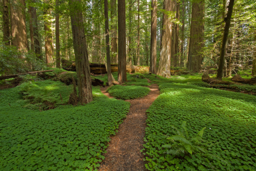

In [9]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [13]:
searches = 'bird', 'forest'
path = Path('bird_or_not')
from time import sleep

# for o in searches:
#     dest = (path/o)
#     dest.mkdir(exist_ok=True, parents=True)
#     download_images(dest, urls=search_images(f'{o} tropic photo'))
#     sleep(10)  # Pause between searches to avoid over-loading server
#     download_images(dest, urls=search_images(f'{o} winter photo'))
#     sleep(10)
#     download_images(dest, urls=search_images(f'{o} retro photo'))
#     sleep(10)
#     resize_images(path/o, max_size=400, dest=path/o)

Searching for 'bird tropic photo'


d:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\duckduckgo_search\compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
d:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\duckduckgo_search\compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
d:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\duckduckgo_search\compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


Searching for 'bird winter photo'
Searching for 'bird retro photo'
Searching for 'forest tropic photo'
Searching for 'forest winter photo'
Searching for 'forest retro photo'


In [17]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

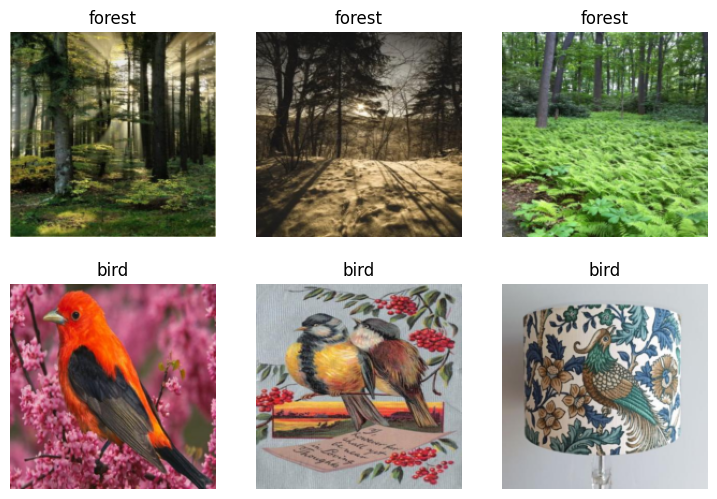

In [16]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [18]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

d:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
d:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.822053,0.478586,0.133333,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.190141,0.055446,0.022222,00:32
1,0.101161,0.069319,0.022222,00:32
2,0.082154,0.072495,0.022222,00:32


In [28]:
is_bird,_,probs = learn.predict(PILImage.create('many_bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9001
